<a href="https://colab.research.google.com/github/lisatwyw/survival/blob/main/SDA_SUPPORT_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Contents

- SEER dataest can be [downloaded](
https://zenodo.org/record/5120960/files/SEER%20Breast%20Cancer%20Dataset%20.csv?download=1) without application

- ```SUPPORT``` (in hd5 format)

- ```sksurv```: ```cph```, ```rsf```

# Setup: Mount drive and install packages

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

subdir='surv'

try:
  os.mkdir( '/content/drive/My Drive/Colab Notebooks/%s'% subdir )
except: 
  pass  
import os
try:
  os.mkdir( '/content/drive/My Drive/Colab Notebooks/%s'% subdir )
except:
  pass  
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/%s'% subdir )

try:
  os.mkdir( '/content/drive/My Drive/Colab Notebooks/packages'  )
except:
  pass  

Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/Colab Notebooks/packages'

bin				      pandas-1.5.2.dist-info
dateutil			      __pycache__
ecos				      python_dateutil-2.8.2.dist-info
ecos-2.0.12.dist-info		      pytz
_ecos.cpython-38-x86_64-linux-gnu.so  pytz-2022.7.dist-info
extension			      qdldl-0.1.5.post2.dist-info
jedi				      qdldl.cpython-38-x86_64-linux-gnu.so
jedi-0.10.0.dist-info		      scikit_learn-1.1.3.dist-info
joblib				      scikit_learn.libs
joblib-1.2.0.dist-info		      scikit_survival-0.19.0.post1.dist-info
numexpr				      scipy
numexpr-2.8.4.dist-info		      scipy-1.9.3.dist-info
numpy				      scipy.libs
numpy-1.23.0.dist-info		      six-1.16.0.dist-info
numpy.libs			      six.py
osqp				      sklearn
osqp-0.6.2.post8.dist-info	      sksurv
osqppurepy			      threadpoolctl-3.1.0.dist-info
pandas				      threadpoolctl.py


In [3]:
import os, sys 
nb_path = '/content/notebooks'

if 0:
  try:
    os.symlink('/content/drive/My Drive/Colab Notebooks/packages', nb_path)
  except:
    pass 

  sys.path.insert(0,nb_path)

  try:
    import sksurv
  except:
    !pip3 install --target=$nb_path jedi==0.10 numpy==1.23 scikit-survival==0.19 


try:
  import pycox
except:
  !pip3 install scikit-survival pycox 


In [4]:
'''
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Requirement already satisfied: scikit-survival in /usr/local/lib/python3.8/dist-packages (0.19.0.post1)
Requirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.9.3)
Requirement already satisfied: joblib in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.2.0)
Requirement already satisfied: numexpr in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (2.8.4)
Requirement already satisfied: numpy in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.23.0)
Requirement already satisfied: osqp!=0.6.0,!=0.6.1 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (0.6.2.post0)
Requirement already satisfied: pandas>=1.0.5 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.3.5)
Requirement already satisfied: ecos in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (2.0.10)
Requirement already satisfied: scikit-learn<1.2,>=1.1.2 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.1.3)
Requirement already satisfied: qdldl in /usr/local/lib/python3.8/dist-packages (from osqp!=0.6.0,!=0.6.1->scikit-survival) (0.1.5.post2)
Requirement already satisfied: pytz>=2017.3 in /usr/local/lib/python3.8/dist-packages (from pandas>=1.0.5->scikit-survival) (2022.6)
Requirement already satisfied: python-dateutil>=2.7.3 in /usr/local/lib/python3.8/dist-packages (from pandas>=1.0.5->scikit-survival) (2.8.2)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/dist-packages (from python-dateutil>=2.7.3->pandas>=1.0.5->scikit-survival) (1.15.0)
Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.8/dist-packages (from scikit-learn<1.2,>=1.1.2->scikit-survival) (3.1.0)
'''

'\nLooking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/\nRequirement already satisfied: scikit-survival in /usr/local/lib/python3.8/dist-packages (0.19.0.post1)\nRequirement already satisfied: scipy>=1.3.2 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.9.3)\nRequirement already satisfied: joblib in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.2.0)\nRequirement already satisfied: numexpr in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (2.8.4)\nRequirement already satisfied: numpy in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.23.0)\nRequirement already satisfied: osqp!=0.6.0,!=0.6.1 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (0.6.2.post0)\nRequirement already satisfied: pandas>=1.0.5 in /usr/local/lib/python3.8/dist-packages (from scikit-survival) (1.3.5)\nRequirement already satisfied: ecos in /usr/local/lib/python3.8/dist-packages (from sci

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn import set_config
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis


from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import (
    concordance_index_censored,
    concordance_index_ipcw,
    cumulative_dynamic_auc,
    integrated_brier_score,
)
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.preprocessing import OneHotEncoder, encode_categorical
from sksurv.util import Surv



In [6]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/surv/pbc.csv') 
print( df.shape  )
print( df.status.unique())
df.head()


(276, 19)
[1 0]


,time,status,treatment,age,sex,ascites,hepatom,spiders,edema,bili,chol,albumin,copper,alk,sgot,trig,platelet,prothrombin,stage
0,41,1,1,24064,1,1,0,0,1.0,17.9,175,2.10,220,705.0,338.00,229,62,12.9,4
1,51,1,2,25772,1,1,0,1,1.0,12.6,200,2.74,140,918.0,147.25,143,302,11.5,4
2,71,1,1,18972,1,0,1,1,0.5,12.2,394,3.08,111,2132.0,155.00,243,165,11.6,4
3,77,1,2,19884,1,1,1,1,0.5,21.6,175,3.31,221,3697.4,101.91,168,80,12.0,4
4,110,1,2,17884,1,1,1,1,1.0,2.5,188,3.67,57,1273.0,119.35,102,110,11.1,4


In [7]:

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/surv/breast.csv') 
print( df.shape  )
print( df.status.unique())
df.head()

(672, 10)
[1 0]


,time,status,hormone,age,menostat,size,grade,pnodes,progrec,estrec
0,72,1,0,59,1,8,2,5,1,30
1,98,1,0,57,1,50,3,13,22,47
2,113,1,0,51,1,70,3,6,28,5
3,114,0,1,55,1,20,1,4,10,128
4,120,1,0,43,0,80,3,11,9,1


In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/surv/kickstarter.csv') 
print( df.shape  )
print( df.status.unique())
df.head()

(4175, 56)
[1 0]


,time,status,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,usr_net_bic,1f_plg,1f_bck,1prj_prom,2f_plg,2f_bck,2prj_prom,3f_plg,3f_bck,3prj_prom
0,1,1,1,0,0,0,0,0,0,0,...,0.000000,9.994073,0.046648,0.000000,15.163901,0.073328,0.000000,15.247005,0.107104,0.000000
1,1,1,1,0,0,0,0,0,0,0,...,0.000000,1.997137,-0.083354,0.000000,1.544977,-0.102276,0.000000,1.284910,-0.113991,0.000000
2,1,1,0,0,0,0,1,0,0,0,...,0.470316,2.636237,1.668257,1.000264,2.439467,1.387848,1.732227,2.252687,1.229586,0.580395
3,1,1,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,1,0,0,0,0,1,0,0,0,...,-0.260923,1.587458,0.197177,-0.265049,1.179622,0.103431,-0.280888,1.013062,0.068837,-0.258752


In [9]:
# !wget https://github.com/MGensheimer/nnet-survival/blob/1d728f8c9c4a5f6b886c1910bedf4cf358171dcb/data/rhc.csv?raw=true


In [10]:
from pycox import datasets
df = datasets.metabric.read_df()

In [11]:
print(df.head(3))
df.shape

         x0        x1         x2        x3   x4   x5   x6   x7         x8  \
0  5.603834  7.811392  10.797988  5.967607  1.0  1.0  0.0  1.0  56.840000   
1  5.284882  9.581043  10.204620  5.664970  1.0  0.0  0.0  1.0  85.940002   
2  5.920251  6.776564  12.431715  5.873857  0.0  1.0  0.0  1.0  48.439999   

     duration  event  
0   99.333336      0  
1   95.733330      1  
2  140.233337      0  


(1904, 11)

# Part 1: lung cancer daaset

"The Veterans’ Administration Lung Cancer Trial is a randomized trial of two treatment regimens for lung cancer [consisting] of 137 patients and 8 variables" [Kalbfleisch J. and Prentice R, (1980) The Statistical Analysis of Failure Time Data. New York: Wiley](http://lib.stat.cmu.edu/datasets/veteran)


## 1) Load veterans lung cancer dataset 

In [12]:
from sksurv.datasets import load_veterans_lung_cancer

va_x, va_y = load_veterans_lung_cancer()

In [13]:
va_y

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [14]:
va_x

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test
133,64.0,large,60.0,5.0,no,test
134,67.0,large,70.0,18.0,yes,test
135,65.0,large,80.0,4.0,no,test


## 2) Split to train-test dataset

In [15]:
va_x_train, va_x_test, va_y_train, va_y_test = train_test_split(
    va_x, va_y, test_size=0.2, stratify=va_y["Status"], random_state=0
)

va_x_train

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
66,38.0,large,80.0,5.0,no,standard
121,62.0,adeno,80.0,4.0,yes,test
107,60.0,adeno,40.0,2.0,no,test
57,47.0,large,70.0,2.0,no,standard
98,72.0,smallcell,70.0,3.0,no,test
...,...,...,...,...,...,...
126,68.0,large,70.0,15.0,yes,test
67,53.0,large,70.0,8.0,yes,standard
83,52.0,squamous,80.0,28.0,yes,test
5,49.0,squamous,20.0,5.0,no,standard


## 3) CPH model fitting and evaluation using time-dependent risk scores (D-AUC) 

In [16]:
va_times = np.arange(8, 184, 7)

cph = make_pipeline(OneHotEncoder(), CoxPHSurvivalAnalysis())
cph.fit(va_x_train, va_y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('coxphsurvivalanalysis', CoxPHSurvivalAnalysis())])

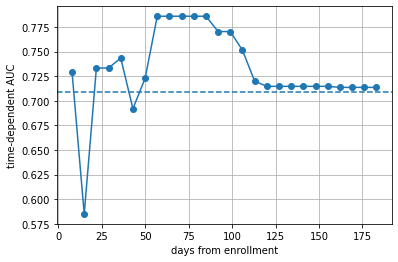

In [17]:
cph_risk_scores = cph.predict(va_x_test)
cph_auc, cph_mean_auc = cumulative_dynamic_auc(
    va_y_train, va_y_test, cph_risk_scores, va_times
)

plt.plot(va_times, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)

## 3) RSF fitting and predictions evaluated using time-dpendent risk scores

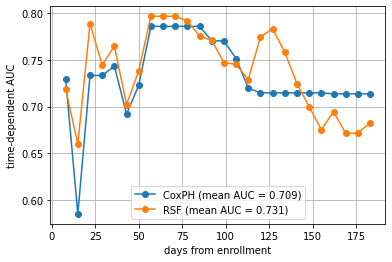

In [18]:
rsf = make_pipeline(
    OneHotEncoder(),
    RandomSurvivalForest(n_estimators=100, min_samples_leaf=7, random_state=0)
)

rsf.fit(va_x_train, va_y_train)

rsf_chf_funcs = rsf.predict_cumulative_hazard_function( va_x_test, return_array=False)

rsf_risk_scores = np.row_stack([chf(va_times) for chf in rsf_chf_funcs])

rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(
    va_y_train, va_y_test, rsf_risk_scores, va_times
)

plt.plot(va_times, cph_auc, "o-", label="CoxPH (mean AUC = {:.3f})".format(cph_mean_auc))
plt.plot(va_times, rsf_auc, "o-", label="RSF (mean AUC = {:.3f})".format(rsf_mean_auc))
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.legend(loc="lower center")
plt.grid(True)


# Part 2: SUPPORT 

## 1) Load SUPPORT dataset

In [19]:
#import lifelines
#print('done')

if 0:
  import torch    
  import torch.optim as optim 
  import torch.nn as nn

  dtype = torch.float
  device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
  device
  # !pip3 install torchtuples


In [20]:
data_support = pd.read_csv('support_parsed.csv')
data_support.shape

(9105, 41)

In [21]:
data_support.head(3)

,time,dead,dzgroupCHF,dzgroupCirrhosis,dzgroupColonCancer,dzgroupComa,dzgroupCOPD,dzgroupLungCancer,dzgroupMOSFMalig,comorbs,...,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,adls
0,2029,0,0,0,0,0,0,1,0,0,...,69.0,22,36.00000,388.00000,1.799805,0.199982,1.199951,141,7.459961,7
1,4,1,0,1,0,0,0,0,0,2,...,112.0,34,34.59375,98.00000,3.500000,1.010000,5.500000,132,7.250000,1
2,47,1,0,1,0,0,0,0,0,2,...,88.0,28,37.39844,231.65625,3.500000,2.199707,2.000000,134,7.459961,0


## 2) Construct structured array of event and time

In [22]:
va_y = Surv.from_arrays(  time=data_support['time'], event=data_support['dead'], name_event='Status' )
va_y


array([(False, 2029.), ( True,    4.), ( True,   47.), ...,
       (False,  346.), ( True,    7.), ( True,  198.)],
      dtype=[('Status', '?'), ('time', '<f8')])

## 3) Prepare input variables


In [23]:
va_x = data_support.drop( columns='time')
va_x = va_x.drop( columns='dead')

In [24]:
data_support.keys()

Index(['time', 'dead', 'dzgroupCHF', 'dzgroupCirrhosis', 'dzgroupColonCancer',
       'dzgroupComa', 'dzgroupCOPD', 'dzgroupLungCancer', 'dzgroupMOSFMalig',
       'comorbs', 'edu', 'income11to25', 'income25to50', 'incomeunder11',
       'incomeunknown', 'scoma', 'avtisst', 'raceblack', 'racehispanic',
       'raceother', 'raceunknown', 'racewhite', 'sps', 'aps', 'hday',
       'diabetes', 'dementia', 'cano', 'cayes', 'meanbp', 'wblc', 'hrt',
       'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'adls'],
      dtype='object')

## 4) Process input variables 

In [25]:
from sklearn import preprocessing

va_x_copy= va_x.copy()
encoders = dict()

for c in va_x.keys():
  e=isinstance( va_x[c][0], str )
  
  if e:    
    encoders[c]= preprocessing.LabelEncoder() 
    encoders[c].fit( va_x[c].values )
    va_x_copy[c] = encoders[c].transform( va_x[c].values )    
    print( c, type(va_x[c][0]), e )
  else:
    print(c, '--> no change')
    print( '{:.2f}, [{:.2f}, {:.2f}]'.format( np.median( va_x[c] ), min( va_x[c] ), max( va_x[c] ) ))
    va_x_copy[c] = va_x[c]


dzgroupCHF --> no change
0.00, [0.00, 1.00]
dzgroupCirrhosis --> no change
0.00, [0.00, 1.00]
dzgroupColonCancer --> no change
0.00, [0.00, 1.00]
dzgroupComa --> no change
0.00, [0.00, 1.00]
dzgroupCOPD --> no change
0.00, [0.00, 1.00]
dzgroupLungCancer --> no change
0.00, [0.00, 1.00]
dzgroupMOSFMalig --> no change
0.00, [0.00, 1.00]
comorbs --> no change
2.00, [0.00, 9.00]
edu --> no change
12.00, [0.00, 31.00]
income11to25 --> no change
0.00, [0.00, 1.00]
income25to50 --> no change
0.00, [0.00, 1.00]
incomeunder11 --> no change
0.00, [0.00, 1.00]
incomeunknown --> no change
0.00, [0.00, 1.00]
scoma --> no change
0.00, [0.00, 100.00]
avtisst --> no change
19.50, [1.00, 83.00]
raceblack --> no change
0.00, [0.00, 1.00]
racehispanic --> no change
0.00, [0.00, 1.00]
raceother --> no change
0.00, [0.00, 1.00]
raceunknown --> no change
0.00, [0.00, 1.00]
racewhite --> no change
1.00, [0.00, 1.00]
sps --> no change
23.90, [0.20, 99.19]
aps --> no change
34.00, [0.00, 143.00]
hday --> no ch

## 5) Split to train-test sets 

In [26]:
va_x_train, va_x_test, va_y_train, va_y_test = train_test_split(
    va_x_copy, va_y, test_size=0.2, stratify=va_y["Status"], random_state=0
)

## 6) Train a suite of models

In [27]:
random_state = 0
def train():
  models =dict()  
  from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
  from sksurv.ensemble import GradientBoostingSurvivalAnalysis  


  # took ~3 minutes on GPU
  #models['GBT'] = GradientBoostingSurvivalAnalysis(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=random_state  )
  #models['GBT'].fit( va_x_train, va_y_train )
  #cindex = models['GBT'].score( va_x_test, va_y_test)
  #print( 'GBT', round(cindex, 3))  

  # took ~6 minutes on GPU
  models['GBT2'] = GradientBoostingSurvivalAnalysis( n_estimators=200, learning_rate=1, max_depth=1, random_state=random_state )
  models['GBT2'].fit( va_x_train, va_y_train )
  cindex = models['GBT2'].score( va_x_test, va_y_test)

  print('GBT2', round(cindex, 3))
  return models

models = train()

GBT2 0.727


In [64]:
def train2( models ):
  if 1:
    #from sksurv.ensemble import RandomSurvivalForest
    #m = 'rsf'
    #models[m]=RandomSurvivalForest(n_estimators=200, min_samples_leaf=3, random_state=0)
    #models[m].fit(va_x_train, va_y_train)

    m = 'rsf2'
    models[m]=RandomSurvivalForest(n_estimators=100, min_samples_leaf=7, random_state=0)
    models[m].fit(va_x_train, va_y_train)

  if 1:
    m = 'CPH'
    models[m]=CoxPHSurvivalAnalysis()
    models[m].fit(va_x_train, va_y_train)

  return models

models = train2( models )

In [50]:
from sklearn import set_config
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sksurv.svm import FastSurvivalSVM
m = 'svm'  
est = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=0)
#est.fit(va_x_train, va_y_train)
#est.predict( va_x_train )

In [51]:
_, yy = load_veterans_lung_cancer()
yy

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [54]:
def score_survival_model(model, X, y):
    prediction = model.predict(X)
    result = concordance_index_censored(y['Status'], y['Survival_in_days'], prediction)
    print(result[0])
    return result[0]

param_grid = {'alpha': 2. ** np.arange(-12, 13, 2)}
cv = ShuffleSplit( n_splits=3, test_size=0.5, random_state=0)
gcv = GridSearchCV( est, param_grid, scoring=score_survival_model,
                  n_jobs=2, refit=False,
                  cv=cv)

gcv.fit(va_x_train, va_y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.5, train_size=None),
             estimator=FastSurvivalSVM(max_iter=1000, random_state=0,
                                       tol=1e-05),
             n_jobs=2,
             param_grid={'alpha': array([2.44140625e-04, 9.76562500e-04, 3.90625000e-03, 1.56250000e-02,
       6.25000000e-02, 2.50000000e-01, 1.00000000e+00, 4.00000000e+00,
       1.60000000e+01, 6.40000000e+01, 2.56000000e+02, 1.02400000e+03,
       4.09600000e+03])},
             refit=False,
             scoring=<function score_survival_model at 0x7f8b88784e50>)

In [62]:
if 0:
  svm0 = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=0)
  svm0.set_params(**gcv.best_params_)
  svm0.fit( va_x_train, va_y_train )
#yp=svm0.predict(va_x_test)
#    svm0._predict_cumulative_hazard_function( va_x_test, return_array=False)   
dir(svm0)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_argsort_and_resolve_ties',
 '_check_feature_names',
 '_check_n_features',
 '_create_optimizer',
 '_fit',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_cumulative_hazard_function',
 '_predict_function',
 '_predict_risk_score',
 '_predict_survival_function',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_for_fit',
 'alpha',
 'coef_',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'max_iter',
 'n_features_in_',
 'n_iter_',
 'optimizer',
 'optimizer_result_',
 'predict',
 'random

In [78]:
print( va_x_test.shape )
va_x_train.shape

mx_time = data_support['time'].max()
va_times = np.arange(15, mx_time, 15)

mx_time

(1821, 39)


2029

In [79]:
m='rsf2'
F=models[ m ].predict_cumulative_hazard_function( va_x_test, return_array=False)    

CPH
GBT2
rsf2


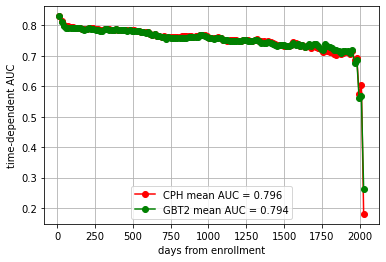

In [81]:
auc = dict()
mean_auc = dict()

clrs=['r','g','y', 'm', 'k', 'b']

def eval_models(models, va_x_test, va_y_train, va_y_test, va_times):
  
  for i,m in enumerate( sorted(models.keys() )):
    print(m)
    F = models[ m ].predict_cumulative_hazard_function( va_x_test, return_array=False)    
    try:
      M = np.row_stack([chf(va_times) for chf in F ] )

      auc[m], mean_auc[m] = cumulative_dynamic_auc( va_y_train, va_y_test, M, va_times )
      plt.plot(va_times, auc[m], "o-", color=clrs[i], label="{} mean AUC = {:.3f}".format(m, mean_auc[m]))
    
      plt.xlabel("days from enrollment")
      plt.ylabel("time-dependent AUC")
      plt.legend(loc="lower center")
      plt.grid(True)
    except:
      pass

  return auc, mean_auc
  
auc, mean_auc = eval_models(models, va_x_test, va_y_train, va_y_test, va_times) 

plt.show()


## 7) Permutation importance

In [43]:
from sklearn.inspection import permutation_importance

random_state =0

m='GBT2'
result = permutation_importance( models[m], va_x_test, va_y_test, n_repeats=15, random_state=random_state )

In [44]:
sorted_arr=pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=va_x_test.columns
).sort_values(by="importances_mean", ascending=False)

sorted_arr.head(10)


,importances_mean,importances_std
avtisst,0.046401,0.004223
cano,0.030332,0.002733
scoma,0.029275,0.002662
sps,0.024643,0.003773
dzgroupLungCancer,0.021904,0.002240
aps,0.015281,0.002033
dzgroupComa,0.009551,0.002448
dzgroupMOSFMalig,0.006343,0.000694
adls,0.006264,0.001186
dzgroupColonCancer,0.004467,0.001185
